    
# Manifold learning on handwritten digits: Locally Linear Embedding, Isomap...

We illustrate various embedding techniques on the digits dataset.


In [2]:
#Authors: Fabian Pedregosa <fabian.pedregosa@inria.fr>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>
#          Gael Varoquaux
#          Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: BSD 3 clause (C) INRIA 2011

## Load digits dataset
We will load the digits dataset and only use six first of the ten available classes.



This code prepares a subset of the handwritten digits dataset for further analysis or modeling, with a focus on digits 0 through 5.

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape
n_neighbors = 30

We can plot the first hundred digits from this data set.



This code segment visualizes a 10x10 grid of digit images from the dataset, providing a glimpse into the 64-dimensional handwritten digits dataset.

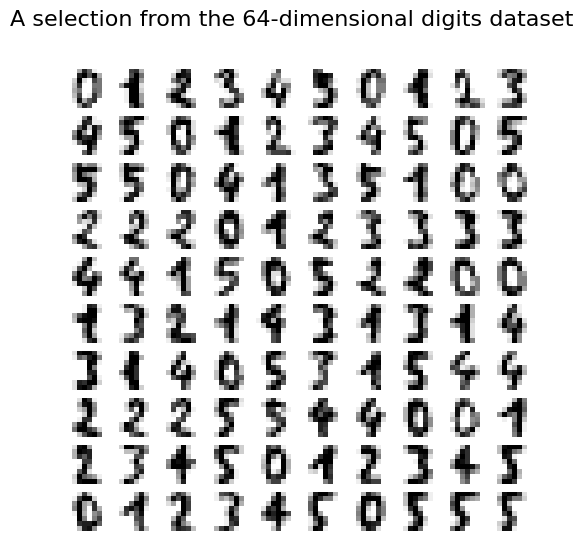

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

## Helper function to plot embedding
Below, we will use different techniques to embed the digits dataset. We will plot
the projection of the original data onto each embedding. It will allow us to
check whether or digits are grouped together in the embedding space, or
scattered across it.



The function plot_embedding provides a visualization of embeddings in a 2D space, combining scatter plot markers with annotations of actual digit images to give insights into the data distribution.

In [ ]:
import numpy as np
from matplotlib import offsetbox

from sklearn.preprocessing import MinMaxScaler


def plot_embedding(X, title):
    _, ax = plt.subplots()
    X = MinMaxScaler().fit_transform(X)

    for digit in digits.target_names:
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            s=60,
            color=plt.cm.Dark2(digit),
            alpha=0.425,
            zorder=2,
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]
        )
        imagebox.set(zorder=1)
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")

## Embedding techniques comparison

Below, we compare different techniques. However, there are a couple of things
to note:

* the :class:`~sklearn.ensemble.RandomTreesEmbedding` is not
  technically a manifold embedding method, as it learn a high-dimensional
  representation on which we apply a dimensionality reduction method.
  However, it is often useful to cast a dataset into a representation in
  which the classes are linearly-separable.
* the :class:`~sklearn.discriminant_analysis.LinearDiscriminantAnalysis` and
  the :class:`~sklearn.neighbors.NeighborhoodComponentsAnalysis`, are supervised
  dimensionality reduction method, i.e. they make use of the provided labels,
  contrary to other methods.
* the :class:`~sklearn.manifold.TSNE` is initialized with the embedding that is
  generated by PCA in this example. It ensures global stability  of the embedding,
  i.e., the embedding does not depend on random initialization.



**MDS (Multidimensional Scaling) Embedding:**

Uses MDS algorithm to reduce dimensionality.
Parameters:
n_components: Number of dimensions for the embedding (set to 2 for 2D visualization).
n_init: Number of times the MDS algorithm will be run with different initializations.
max_iter: Maximum number of iterations for the optimization process.
n_jobs: Number of parallel jobs to run (set to 2 for parallel processing).

**t-SNE (t-Distributed Stochastic Neighbor Embedding) Embedding:**

Utilizes t-SNE algorithm for dimensionality reduction.
Parameters:
n_components: Number of dimensions for the embedding (set to 2 for 2D visualization).
n_iter: Maximum number of iterations for the optimization.
n_iter_without_progress: Maximum number of iterations without progress.
n_jobs: Number of parallel jobs to run (set to 2 for parallel processing).
random_state: Seed used by the random number generator.

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.manifold import (
    MDS,
    TSNE,
    Isomap,
    LocallyLinearEmbedding,
    SpectralEmbedding,
)
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.random_projection import SparseRandomProjection

embeddings = {
    "MDS embedding": MDS(n_components=2, n_init=1, max_iter=120, n_jobs=2),
    "t-SNE embedding": TSNE(
        n_components=2,
        n_iter=500,
        n_iter_without_progress=150,
        n_jobs=2,
        random_state=0,
    ),

}

Once we declared all the methods of interest, we can run and perform the projection
of the original data. We will store the projected data as well as the computational
time needed to perform each projection.



In [ ]:
from time import time

projections, timing = {}, {}
for name, transformer in embeddings.items():
    if name.startswith("Linear Discriminant Analysis"):
        data = X.copy()
        data.flat[:: X.shape[1] + 1] += 0.01  # Make X invertible
    else:
        data = X

    print(f"Computing {name}...")
    start_time = time()
    projections[name] = transformer.fit_transform(data, y)
    timing[name] = time() - start_time

Computing MDS embedding...


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Computing t-SNE embedding...


Finally, we can plot the resulting projection given by each method.



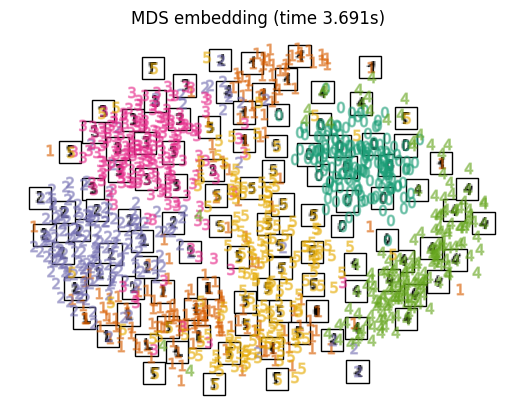

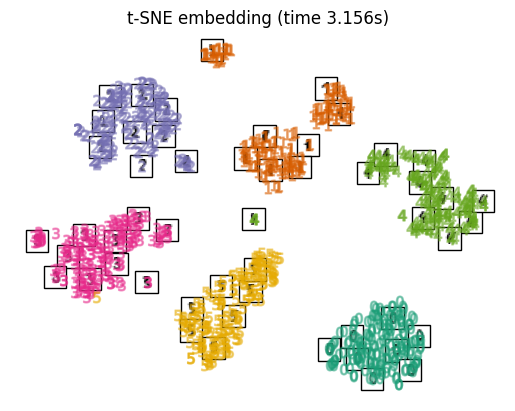

In [ ]:
for name in timing:
    title = f"{name} (time {timing[name]:.3f}s)"
    plot_embedding(projections[name], title)

plt.show()

- <span style="color: white;">The data points are handwritten digits. The numbers within each cluster appear to be handwritten digits from 0 to 5. This suggests that the data might come from a dataset of images of handwritten digits..</span>


- <span style="color: orange;">The *MDS* embedding preserves some of the structure of the data. The clusters of points are relatively well-separated, indicating that the MDS embedding captures some of the similarity or dissimilarity of the data points.</span>


- <span style="color: orange;"> The data points are labeled with numbers from 1 to 5. The square markers within each cluster indicate the labels or categories of the data points. This suggests that the data might come from a supervised learning task, where the goal is to predict the label of a data point based on its features..</span>


- <span style="color: orange;">The t-SNE embedding preserves some of the structure of the data. The clusters of points are relatively well-separated, indicating that the t-SNE embedding captures some of the similarity or dissimilarity of the data points. For example, the points labeled 1 are more similar to each other than to the points labeled 2, and this is reflected in the spatial arrangement of the clusters.</span>


Inferences:
- t-SNE embedding provides a more accurate classification in a clustered form.

- t-SNE is awarded the best visual representation .

